# BIKE RENTAL PREDICTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
bike=pd.read_excel('bikerent.xlsx')

In [46]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


 Here, the target column is Rented Bike Count and the rest of the columns are features.

In [47]:
bike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Here,we can see that there are no missing values.

In [48]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
Date                         8760 non-null datetime64[ns]
Rented Bike Count            8760 non-null int64
Hour                         8760 non-null int64
Temperature(°C)              8760 non-null float64
Humidity(%)                  8760 non-null int64
Wind speed (m/s)             8760 non-null float64
Visibility (10m)             8760 non-null int64
Dew point temperature(°C)    8760 non-null float64
Solar Radiation (MJ/m2)      8760 non-null float64
Rainfall(mm)                 8760 non-null float64
Snowfall (cm)                8760 non-null float64
Seasons                      8760 non-null object
Holiday                      8760 non-null object
Functioning Day              8760 non-null object
dtypes: datetime64[ns](1), float64(6), int64(4), object(3)
memory usage: 958.2+ KB


In [49]:
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


The maximum bike rental count is 3556.0 and minimum goes to 0 which means every hour has atleast 1 bike rental. and the mean bike rental count is 704.60

# Exploratory Data Analysis

Text(0.5, 0.98, 'Recorded Bike Rental Counts')

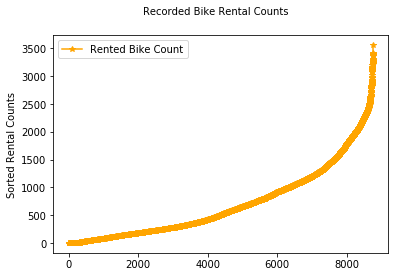

In [66]:
fig, ax = plt.subplots(1)
ax.plot(sorted(bike['Rented Bike Count']), color = 'orange', marker = '*',label='Rented Bike Count')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)

The majority of bike rentals is between 500 to 2000. 

Text(0, 0.5, 'Count of all Bikes Rented')

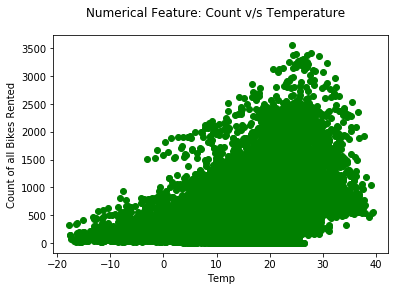

In [63]:
plt.scatter(bike['Temperature(°C)'], bike['Rented Bike Count'],color='green')
plt.suptitle('Numerical Feature: Count v/s Temperature')
plt.xlabel('Temp')
plt.ylabel('Count of all Bikes Rented')

From the above scatter plot we find that number of bikes rented is directly proportional to temperature as they share a linear relationship. The more the temperature , the more number of bikes rented.

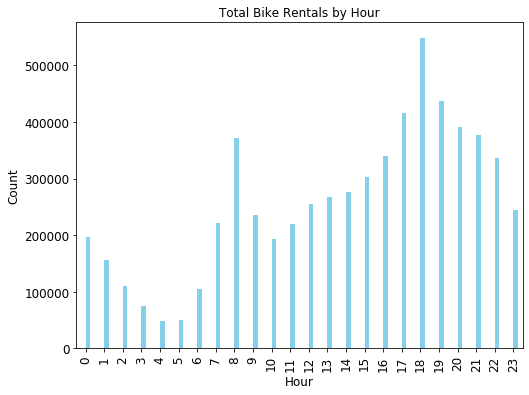

In [147]:
ax = bike[['Hour','Rented Bike Count']].groupby(['Hour']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='skyblue', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

The peak hours of bike rental seems to be during office hours that is at 8:00AM in the morning and 6PM in the evening.

Text(0, 0.5, 'Count of all Bikes Rented')

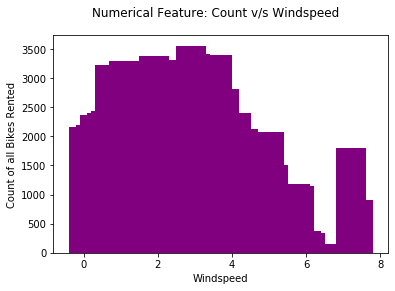

In [64]:
plt.bar(bike['Wind speed (m/s)'], bike['Rented Bike Count'],color='purple')
plt.suptitle('Numerical Feature: Count v/s Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Count of all Bikes Rented')

Here we find a negative linear relationship between bikes rented and windspeed that is if the wind speed is more, people don't prefer to have bike rides.

Text(0, 0.5, 'Count of all Bikes Rented')

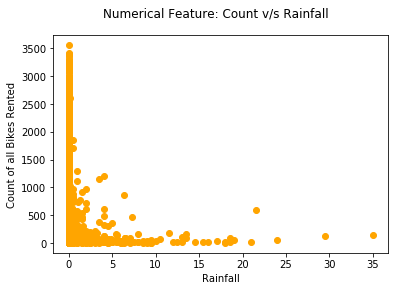

In [148]:
plt.scatter(bike['Rainfall(mm)'], bike['Rented Bike Count'],color='orange')
plt.suptitle('Numerical Feature: Count v/s Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Count of all Bikes Rented')

The bikes rented is maximum during non-rainy days and the count is near to 0 if there is heavy rainfall. Hence, we see here a negative correlation between the two variables.

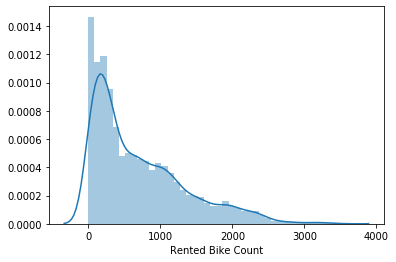

In [75]:
sns.distplot(bike['Rented Bike Count'],label="Rented Bike Count")

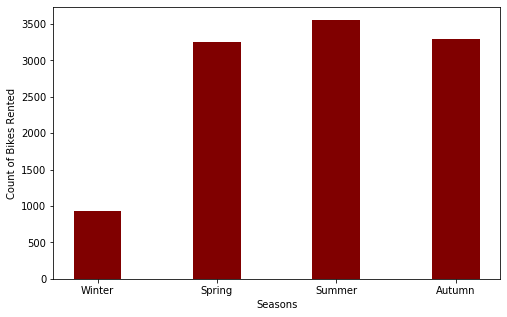

In [85]:
fig=plt.figure(figsize=(8,5))
plt.bar(bike['Seasons'],bike['Rented Bike Count'], color='maroon', width=0.4)
plt.xlabel("Seasons")
plt.ylabel("Count of Bikes Rented")
plt.show()

The bar chart clearly shows that people rent bikes more during Spring and Autumn. The number of bikes rented in Winter is the least.

# Building the model using Linear Regression

In [105]:
bike.drop("Date", axis=1,inplace=True)

In [112]:
bike["Seasons"] = bike["Seasons"].astype('category')
bike["Seasons"] = bike["Seasons"].cat.codes

In [117]:
#bike['Functioning Day']=bike['Functioning Day'].astype('category')
#bike['Functioning Day']=bike['Functioning Day'].catcodes
bike.drop("Holiday", axis=1, inplace=True)

In [118]:
#bike['Holiday']=bike['Holiday'].astype('category')
#bike['Holiday']=bike['Holiday'].catcodes
bike.drop("Functioning Day", axis=1, inplace=True)

In [119]:
X=bike.drop("Rented Bike Count", axis=1)
y=bike['Rented Bike Count']

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [131]:
model = LinearRegression()

In [132]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
pred=model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)

0.483730630112099
0.47596697686521827


In [133]:
print("Root Mean squared error: %.2f" % rmse)

Root Mean squared error: 464.40


# Building the model using GBR

In [136]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [144]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)

0.7785932682803816
0.7617382420470764


 The evaluation metric used is Root Mean Squared Error.

In [145]:
print("Root Mean Squared Error: %.2f" % rmse)

Root Mean Squared Error: 312.47


The model accuracy significantly improved using Gradient Boosting Regressor.